In [2]:
from selective_bayes import *
import numpy as np
import math
import pandas as pd
from sklearn.metrics import normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [3]:
dataset = pd.read_csv('Invistico_Airline.csv')
dataset.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
dataset.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [5]:
column_to_move = dataset.pop("satisfaction")

# insert column with insert(location, column_name, column_value)

dataset.insert(22, "satisfaction", column_to_move)

In [6]:
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,satisfied
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,satisfied
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,satisfied


In [7]:
train, test = train_test_split(dataset, test_size=0.1)
columns_to_bin =  ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [8]:
train, _ = preprocess_dataset(train, 'satisfaction', columns_to_bin=columns_to_bin, columns_to_encode=['satisfaction'], duplicates_drop_cols=['Departure Delay in Minutes', 'Arrival Delay in Minutes'])
test, _ = preprocess_dataset(test, 'satisfaction', columns_to_bin=columns_to_bin, columns_to_encode=['satisfaction'], duplicates_drop_cols=['Departure Delay in Minutes', 'Arrival Delay in Minutes'])

In [19]:
test['satisfaction'].nunique()


2

In [23]:
nb = NB_classifier(train, 'satisfaction')
nb_preds = []
gold_preds = []
for ind, example in test.iterrows():
    prediction = nb.classify(example)
    nb_preds.append(prediction)
    gold_preds.append(example['satisfaction'])
print(f'Accuracy Naive Bayes: {accuracy_score(gold_preds, nb_preds)}')

c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = instance[-1]


{0: 1.402401029405481e-08, 1: 2.921051606372219e-13}
{0: 2.8262814747344824e-09, 1: 8.139626242598083e-09}
{0: 1.2179329463642592e-09, 1: 1.3134197860561222e-10}
{0: 3.6410963718663283e-09, 1: 1.6318319057850102e-06}
{0: 4.868034893339845e-10, 1: 4.377561221089431e-07}
{0: 1.3762082076815416e-10, 1: 8.110926401785621e-13}
{0: 1.4224710192151637e-10, 1: 4.079064368317723e-13}
{0: 2.4729731580161735e-08, 1: 1.109090059181547e-11}
{0: 6.6193067191075e-09, 1: 5.8336855179953035e-12}
{0: 2.1210116190906506e-08, 1: 6.371799781863448e-12}
{0: 2.1229327185779703e-10, 1: 1.6078935565626637e-07}
{0: 1.438840369501082e-15, 1: 1.7826759459138317e-11}
{0: 3.4544223448639666e-10, 1: 3.93338662537585e-13}
{0: 5.4082230894090195e-08, 1: 2.7660353499913806e-10}
{0: 9.561016640565735e-15, 1: 7.82969418267437e-12}
{0: 1.1506095807530248e-08, 1: 7.060753742564917e-12}
{0: 5.287475008936917e-11, 1: 1.0439943881606885e-07}
{0: 1.9887866121720275e-13, 1: 2.1687376388038966e-07}
{0: 6.49061610515976e-10, 1: 3

In [9]:
snb = Selective_NB_classifier(train, target_col='satisfaction')

c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = instance[-1]


In [15]:
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(0.)

In [16]:
train['Arrival Delay in Minutes'].unique()

array([0., 1., 2.])

In [17]:
snb.calculate_mutual_information()
snb.order_by_mi()

Gender
Customer Type
Age
Type of Travel
Class
Flight Distance
Seat comfort
Departure/Arrival time convenient
Food and drink
Gate location
Inflight wifi service
Inflight entertainment
Online support
Ease of Online booking
On-board service
Leg room service
Baggage handling
Checkin service
Cleanliness
Online boarding
Departure Delay in Minutes
Arrival Delay in Minutes


In [18]:
snb.select_best_model()

0it [00:00, ?it/s]c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = example[-1]
c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_gold = example[-1] # true label
c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:94: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior

{(11,): 0.3833922493629035, (11, 6): 0.35815419000745796, (11, 6, 13): 0.3298306190297561, (11, 6, 13, 12): 0.3364681922291288, (11, 6, 13, 12, 1): 0.32961443380464756, (11, 6, 13, 12, 1, 4): 0.3187767098696092, (11, 6, 13, 12, 1, 4, 14): 0.3119668519603356, (11, 6, 13, 12, 1, 4, 14, 19): 0.3266418517408766, (11, 6, 13, 12, 1, 4, 14, 19, 15): 0.3232196444735033, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16): 0.3270537215244855, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18): 0.3350585963247268, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18, 17): 0.3371522401484904, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18, 17, 0): 0.3310890063320327, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18, 17, 0, 8): 0.3294393468941789, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18, 17, 0, 8, 10): 0.3367123625892355, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18, 17, 0, 8, 10, 5): 0.3330380397775644, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18, 17, 0, 8, 10, 5, 2): 0.33170529559596157, (11, 6, 13, 12, 1, 4, 14, 19, 15, 16, 18, 17, 0, 8, 10, 5, 2, 

In [ ]:
preds = []
gold = []
for ind, example in test.iterrows():
        prediction = snb.classify(example)
        preds.append(prediction)
        gold.append(example['satisfaction'])
print(f'Accuracy Selective Naive Bayes with optimal attributes: {accuracy_score(gold, preds)}')

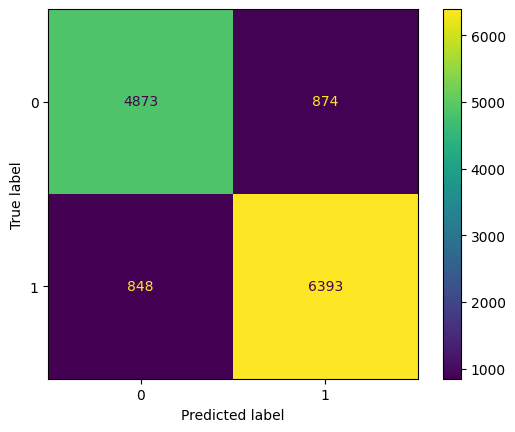

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(gold, preds, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

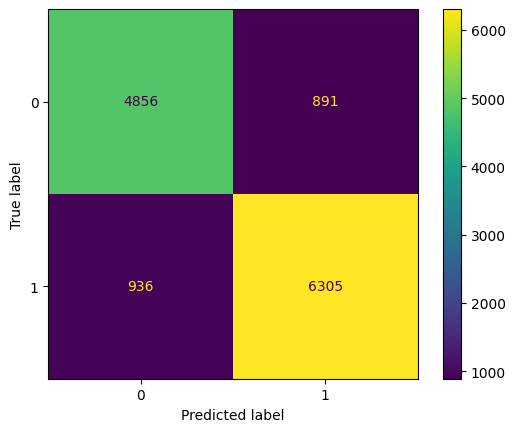

In [24]:
cm = confusion_matrix(gold_preds, nb_preds, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()